# Set Training data
Having organized the time series of earth observation images in a consistent dataset, this can now be manipulated to incorporate new temporal variables or incorporate other data. In this notebook, three different operations are demosntrated:

- Calculation of temporal trends of a band (e.g. NDVI)
- Training Data classes using a shapefile
- Serialization and reading of xarray Dataset and netCDF files

## Construction of xarray Dataset
Using the eo_stack classes demonstrated in [previous notebook], a Dataset of 8 Sentinel-2 images for the Saldana region in constructed.

In [1]:
import sys
sys.path.append('../b_Temporal_Stack')

from regionstack import *
from eotempstack import *

from xr_eotemp import *

saldana = regionStack('Saldana_training_2015')

S1 object initialized from /mnt/workspace_cluster_6/TRANSVERSAL_PROJECTS/MADR/COMPONENTE_2/Imagenes_Satelitales/Temp/asalazar_tests/data/Saldana_training_2015/pre/
Stacking S1 failed: <class 'StopIteration'>  <traceback object at 0x7f425d1e2988>
Reading 8 S1 stack files
S1 object initialized from /mnt/workspace_cluster_6/TRANSVERSAL_PROJECTS/MADR/COMPONENTE_2/Imagenes_Satelitales/Temp/asalazar_tests/data/Saldana_training_2015/pre/
Stacking S1 failed: <class 'StopIteration'>  <traceback object at 0x7f425d708bc8>
Reading 6 S1 stack files
GLCM_S1 object initialized from /mnt/workspace_cluster_6/TRANSVERSAL_PROJECTS/MADR/COMPONENTE_2/Imagenes_Satelitales/Temp/asalazar_tests/data/Saldana_training_2015/pre/
Reading 4 GLCM_S1 stack files
GLCM_S1 object initialized from /mnt/workspace_cluster_6/TRANSVERSAL_PROJECTS/MADR/COMPONENTE_2/Imagenes_Satelitales/Temp/asalazar_tests/data/Saldana_training_2015/pre/
Reading 3 GLCM_S1 stack files
S2 object initialized from /mnt/workspace_cluster_6/TRANSVER

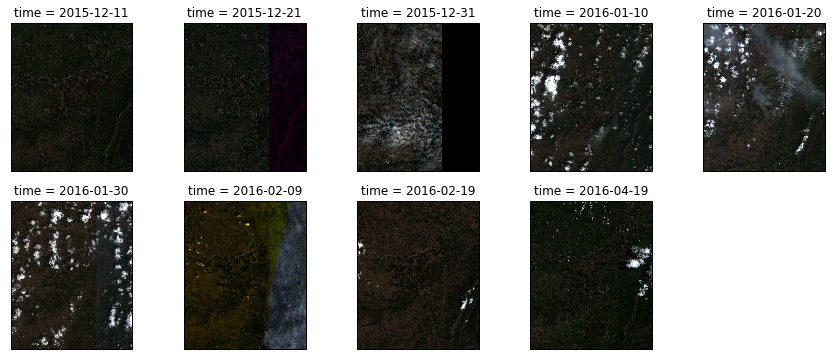

In [3]:
saldana.s2.eotemp.plot_RGB()

## Calculation of temporal trends
Calculate NDVI change from last image, i.e. slope, first derivative

In [5]:
# Ispect xarray Datataset
saldana.s2

<xarray.Dataset>
Dimensions:  (time: 8, x: 2979, y: 3631)
Coordinates:
  * x        (x) float64 4.889e+05 4.889e+05 4.889e+05 4.889e+05 4.889e+05 ...
  * y        (y) float64 4.485e+05 4.484e+05 4.484e+05 4.484e+05 4.484e+05 ...
  * time     (time) datetime64[ns] 2015-12-11 2015-12-21 2015-12-31 ...
    mask     (time, y, x) bool dask.array<shape=(8, 3631, 2979), chunksize=(8, 3631, 2979)>
Data variables:
    blue     (time, y, x) uint16 dask.array<shape=(8, 3631, 2979), chunksize=(8, 3631, 2979)>
    swir1    (time, y, x) uint16 dask.array<shape=(8, 3631, 2979), chunksize=(8, 3631, 2979)>
    swir2    (time, y, x) uint16 dask.array<shape=(8, 3631, 2979), chunksize=(8, 3631, 2979)>
    green    (time, y, x) uint16 dask.array<shape=(8, 3631, 2979), chunksize=(8, 3631, 2979)>
    nir      (time, y, x) uint16 dask.array<shape=(8, 3631, 2979), chunksize=(8, 3631, 2979)>
    NDVI     (time, y, x) float32 dask.array<shape=(8, 3631, 2979), chunksize=(8, 3631, 2979)>
    LSWI     (time, y, x) 

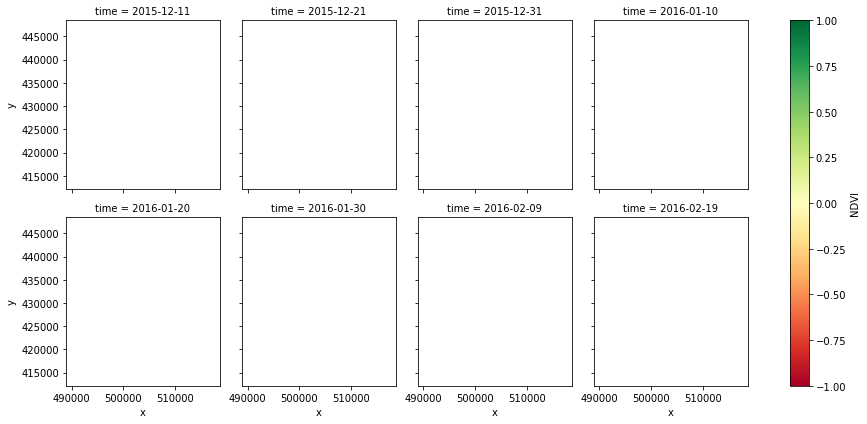

In [12]:
# Plot all NDVI using mask (facetgrid not working, all plots blank)
# .where(s2_xds.mask)
s2_xds.NDVI.plot(col='time', col_wrap=4, vmin=-1., vmax=1., cmap='RdYlGn', sharex=True, sharey=True)

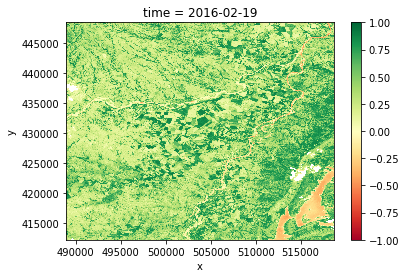

In [16]:
# Individual plots do work
last = s2_xds.isel(time=-1)

last.NDVI.where(last.mask).plot(vmin=-1., vmax=1., cmap='RdYlGn')

In [2]:
# Calculate the trends for the s2 NDVI band
NDVI_trend = saldana.s2.eotemp.calcTempTrend('NDVI')

In [4]:
# Inspect the results
NDVI_trend

<xarray.DataArray 'trend' (y: 3631, x: 2979)>
array([[-0.003518, -0.006998, -0.004652, ...,  0.004077,  0.010501,  0.010864],
       [-0.00423 , -0.002383, -0.002193, ...,  0.002272,  0.009217,  0.008497],
       [-0.008521, -0.001971,  0.001481, ...,  0.001951,  0.006481,  0.002747],
       ...,
       [-0.001035, -0.002877, -0.00196 , ...,  0.003358,  0.010288,  0.0186  ],
       [-0.005447, -0.003988, -0.004859, ...,  0.004823,  0.009107,  0.016632],
       [-0.004844, -0.005437, -0.008845, ...,  0.010115,  0.008059,  0.013915]])
Coordinates:
  * x        (x) float64 4.889e+05 4.889e+05 4.889e+05 4.889e+05 4.889e+05 ...
  * y        (y) float64 4.485e+05 4.484e+05 4.484e+05 4.484e+05 4.484e+05 ...
    time     datetime64[ns] 2016-02-19
    mask     (y, x) bool dask.array<shape=(3631, 2979), chunksize=(3631, 2979)>

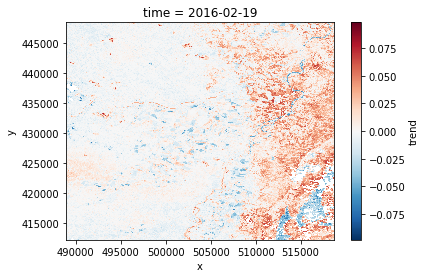

In [3]:
# Plot the NDVI trend
NDVI_trend.plot()

In [9]:
# Compute the trend for radar VV ASC
VV_trend = saldana.s1_ASC.eotemp.calcTempTrend('VV')

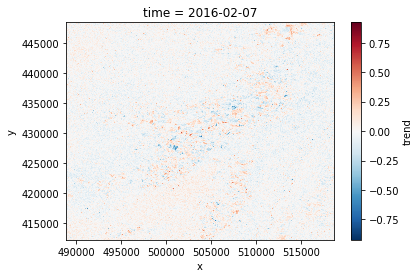

In [10]:
VV_trend.plot()

In [2]:
lswi_trend = saldana.l8.eotemp.calcTempTrend('LSWI', ndate=-2)

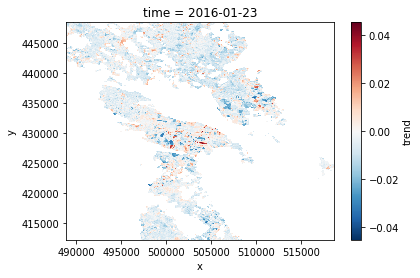

In [28]:
lswi_trend.plot()

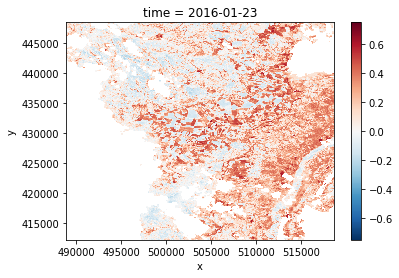

In [26]:
saldana.l8.sortby("time").isel(time=-2).LSWI.where(saldana.l8.sortby("time").isel(time=-2).mask).plot()

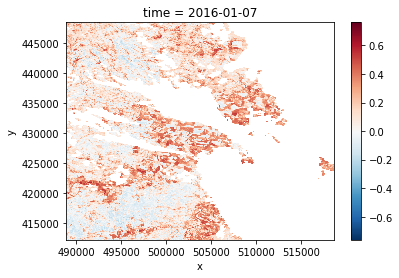

In [24]:
saldana.l8.sortby("time").isel(time=-3).LSWI.where(saldana.l8.sortby("time").isel(time=-3).mask).plot()

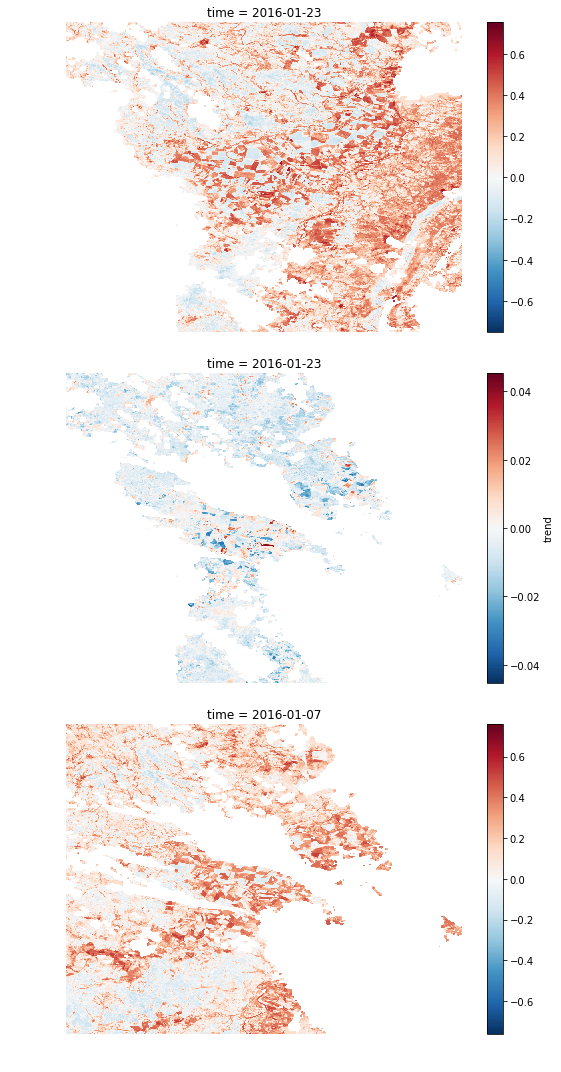

In [3]:
# Visualize results
fig, ax = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(8, 15))

saldana.l8.sortby("time").isel(time=-2).LSWI.where(saldana.l8.sortby("time").isel(time=-2).mask).plot(ax=ax[0])
lswi_trend.plot(ax=ax[1])#, cmap='gray')
saldana.l8.sortby("time").isel(time=-3).LSWI.where(saldana.l8.sortby("time").isel(time=-3).mask).plot(ax=ax[2])

ax[1].set_title('LSWI Trend')

for a in ax.ravel():
    a.set_axis_off()
plt.tight_layout()

plt.savefig('ldwi_trend.png', dpi=100)

#plt.show()

## Training classes from shapefile
the general approach is reading and rasterizing shapefiles using rasterio (need to reproject to eo images crs). The resulting object can the be read using xarray rasterio method, which can be used to mask xarray objects.

Construct training data with available phenology stages

In [1]:
import sys
sys.path.append('../b_Temporal_Stack')

from regionstack import *
from eotempstack import *

from xr_eotemp import *

saldana = regionStack('Saldana_training_2015')

S1 object initialized from /mnt/workspace_cluster_6/TRANSVERSAL_PROJECTS/MADR/COMPONENTE_2/Imagenes_Satelitales/Temp/asalazar_tests/data/Saldana_training_2015/pre/
Creation of new S1 stacks failed, reading existing stacks
Reading 4 S1 stack files
S1 object initialized from /mnt/workspace_cluster_6/TRANSVERSAL_PROJECTS/MADR/COMPONENTE_2/Imagenes_Satelitales/Temp/asalazar_tests/data/Saldana_training_2015/pre/
Creation of new S1 stacks failed, reading existing stacks
Reading 3 S1 stack files
S2 object initialized from /mnt/workspace_cluster_6/TRANSVERSAL_PROJECTS/MADR/COMPONENTE_2/Imagenes_Satelitales/Temp/asalazar_tests/data/Saldana_training_2015/pre/
Reading 3 S2 stack files
LE07 object initialized from /mnt/workspace_cluster_6/TRANSVERSAL_PROJECTS/MADR/COMPONENTE_2/Imagenes_Satelitales/Temp/asalazar_tests/data/Saldana_training_2015/pre/
Reading 4 LE07 stack files
LC08 object initialized from /mnt/workspace_cluster_6/TRANSVERSAL_PROJECTS/MADR/COMPONENTE_2/Imagenes_Satelitales/Temp/asala

In [2]:
shp_file = '/home/azalazar/data/saldana.shp'

saldana.regionTrainingClasses(shp_file, testset=0.3)

Adding dataset with classes as train attribute of regionStack


In [3]:
bands = ['NDVI','LSWI','VV_ASC','VV_DSC','VH_DSC']

for band in bands:
    
    first_date = np.empty(saldana.train[band].isel(time=0).shape)
    first_date[:] = np.nan
    
    c_arrays = [first_date]
    
    for idx, time in enumerate(saldana.train.time[1:].values):
        print('Processing band {} for date {}'.format(band,time))
        
        c_arrays.append(saldana.train.eotemp.calcTempTrend(band,ndate=-idx-1))
        
    c = np.stack(c_arrays,axis=2)
    
    saldana.train[band+'_c'] = (['x','y','time'],c)

Processing band NDVI for date 2015-12-21T00:00:00.000000000
Processing band NDVI for date 2015-12-31T00:00:00.000000000
Processing band NDVI for date 2016-01-10T00:00:00.000000000
Processing band LSWI for date 2015-12-21T00:00:00.000000000
Processing band LSWI for date 2015-12-31T00:00:00.000000000
Processing band LSWI for date 2016-01-10T00:00:00.000000000
Processing band VV_ASC for date 2015-12-21T00:00:00.000000000
Processing band VV_ASC for date 2015-12-31T00:00:00.000000000
Processing band VV_ASC for date 2016-01-10T00:00:00.000000000
Processing band VV_DSC for date 2015-12-21T00:00:00.000000000
Value pairs are all nAn. No good quality pixels are available for the specified dates
Processing band VV_DSC for date 2015-12-31T00:00:00.000000000
Processing band VV_DSC for date 2016-01-10T00:00:00.000000000
Processing band VH_DSC for date 2015-12-21T00:00:00.000000000
Value pairs are all nAn. No good quality pixels are available for the specified dates
Processing band VH_DSC for date 20

In [4]:
saldana.train.transpose('time','x','y')

<xarray.Dataset>
Dimensions:   (time: 4, x: 2981, y: 3635)
Coordinates:
  * y         (y) float64 4.122e+05 4.122e+05 4.122e+05 4.122e+05 4.122e+05 ...
  * x         (x) float64 4.889e+05 4.889e+05 4.889e+05 4.889e+05 4.889e+05 ...
  * time      (time) datetime64[ns] 2015-12-11 2015-12-21 2015-12-31 2016-01-10
    mask      (time, x, y) bool dask.array<shape=(4, 2981, 3635), chunksize=(1, 2981, 3635)>
Data variables:
    NDVI      (time, x, y) float32 dask.array<shape=(4, 2981, 3635), chunksize=(1, 2981, 3635)>
    LSWI      (time, x, y) float32 dask.array<shape=(4, 2981, 3635), chunksize=(1, 2981, 3635)>
    VV_ASC    (time, x, y) float32 dask.array<shape=(4, 2981, 3635), chunksize=(1, 2981, 3635)>
    VV_DSC    (time, x, y) float32 dask.array<shape=(4, 2981, 3635), chunksize=(1, 2981, 3635)>
    VH_DSC    (time, x, y) float32 dask.array<shape=(4, 2981, 3635), chunksize=(1, 2981, 3635)>
    train     (time, x, y) float64 dask.array<shape=(4, 2981, 3635), chunksize=(1, 2981, 3635)>
   

In [5]:
# Inspect dataframe
# Select only data from a date and transform to pandas dataframe
data_pd = saldana.train.transpose('time','x','y').to_dask_dataframe()
t_dir = saldana.data_directory

from dask.diagnostics import ProgressBar
from dask.dataframe import to_parquet
with ProgressBar():
    to_parquet(data_pd, t_dir+'parquet/')#train_temp-*.parquet')
    #data_pd.to_csv(, chunksize=10835935)

RuntimeError: Please install either fastparquet or pyarrow

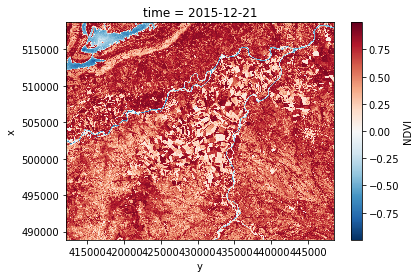

In [44]:
saldana.train.NDVI.sel(time='2015-12-21').plot()

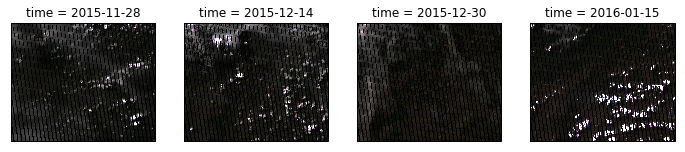

In [5]:
saldana.l7.eotemp.plot_RGB()

## Serialization and reading
Using to_netcdf. Please note that the parameters are not optimized. Extensive documentation on this topic is available at http://xarray.pydata.org/en/stable/io.html and https://www.unidata.ucar.edu/blogs/developer/en/entry/netcdf_compression

In [ ]:
## Store data in disk

sat_data.to_netcdf('/home/azalazar/data/training_data/s2phc.nc')

In [ ]:
## Read from disk

sat_data_again = xr.open_mfdataset('/home/azalazar/data/training_data/s2phc.nc')
sat_data_again

In [ ]:
sat_data_again['NDVI'].sel(time='2015-12-22').where(sat_data_again.mask.sel(time='2015-12-22')).plot(vmin=-1., vmax=1., cmap='RdYlGn')